Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and ridge, Lasso regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [120]:
# Load the dataset
df = pd.read_csv("uber.csv")
# view dataset
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [121]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [122]:
# Fill missing values in all numeric columns with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)
# is filling missing (NaN) values in the DataFrame df with the mean of each numeric column.

# df.mean(numeric_only=True):
# This calculates the mean (average) for each numeric column in df.

# Setting numeric_only=True ensures that only numeric columns are considered when calculating the mean, ignoring any non-numeric columns.

# The fillna() method is used to replace all NaN values in the DataFrame with specified values.
# Setting inplace=True ensures that the changes are applied directly to df, modifying it without the need to reassign it to a new variable.


In [123]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [124]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'])

In [125]:
# check datasets for removal of columns we removed 'first_column with no name', 'key' and 'pickup_datetime' column
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


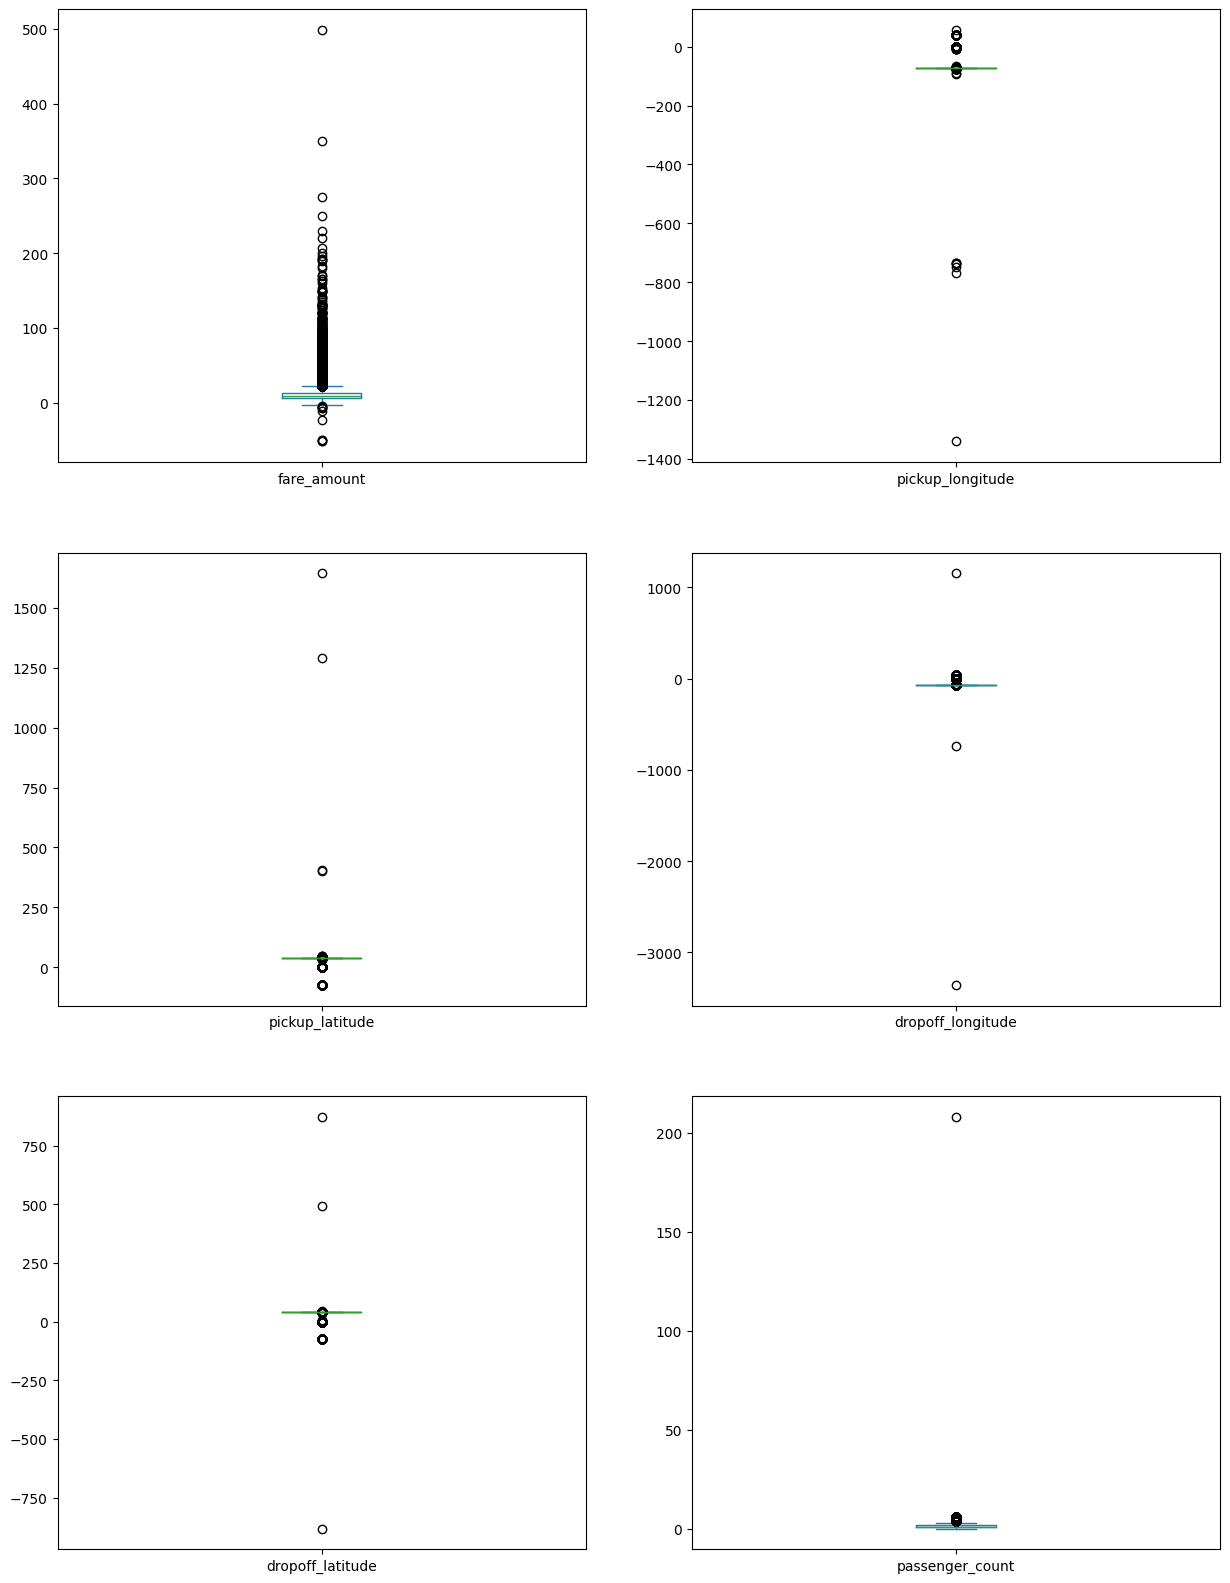

In [126]:
# A boxplot (or box-and-whisker plot) is a statistical chart used to display the distribution of data points
#  based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.

# Using boxplot to visualize outliers
df.plot(kind = "box",subplots = True,layout = (3,2),figsize=(15,20))
plt.show()


# df.plot(kind="box", ...):
# This tells pandas to create a boxplot for each column in the DataFrame. 

# subplots=True:
# Setting subplots=True tells pandas to generate a separate boxplot for each column in df,
#  rather than combining all columns into a single plot.
# Each plot will show the distribution of values and potential outliers for each column independently.


# layout=(6, 2):
# This defines the layout for the subplots.
# (6, 2) specifies a grid with 6 rows and 2 columns, so the individual boxplots will be organized within this structure.





In [127]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    # df1[col] this means current column for dataframe 
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

# np.clip(array, min_value, max_value) is a NumPy function that restricts the values in an array (or column) so that:

# Any values below min_value are set to min_value.
# Any values above max_value are set to max_value.
# Values within the range remain unchanged.

# np.clip([1, 3, 5, 100, 200], 0, 10)
# Would result in [1, 3, 5, 10, 10], with the values 100 and 200 clipped to 10.

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        # for each column calling this function to remove outlier
        df1 = remove_outlier(df , c)
    return df1

In [128]:
df = treat_outliers_all(df, df.columns)

# sending all column names and data

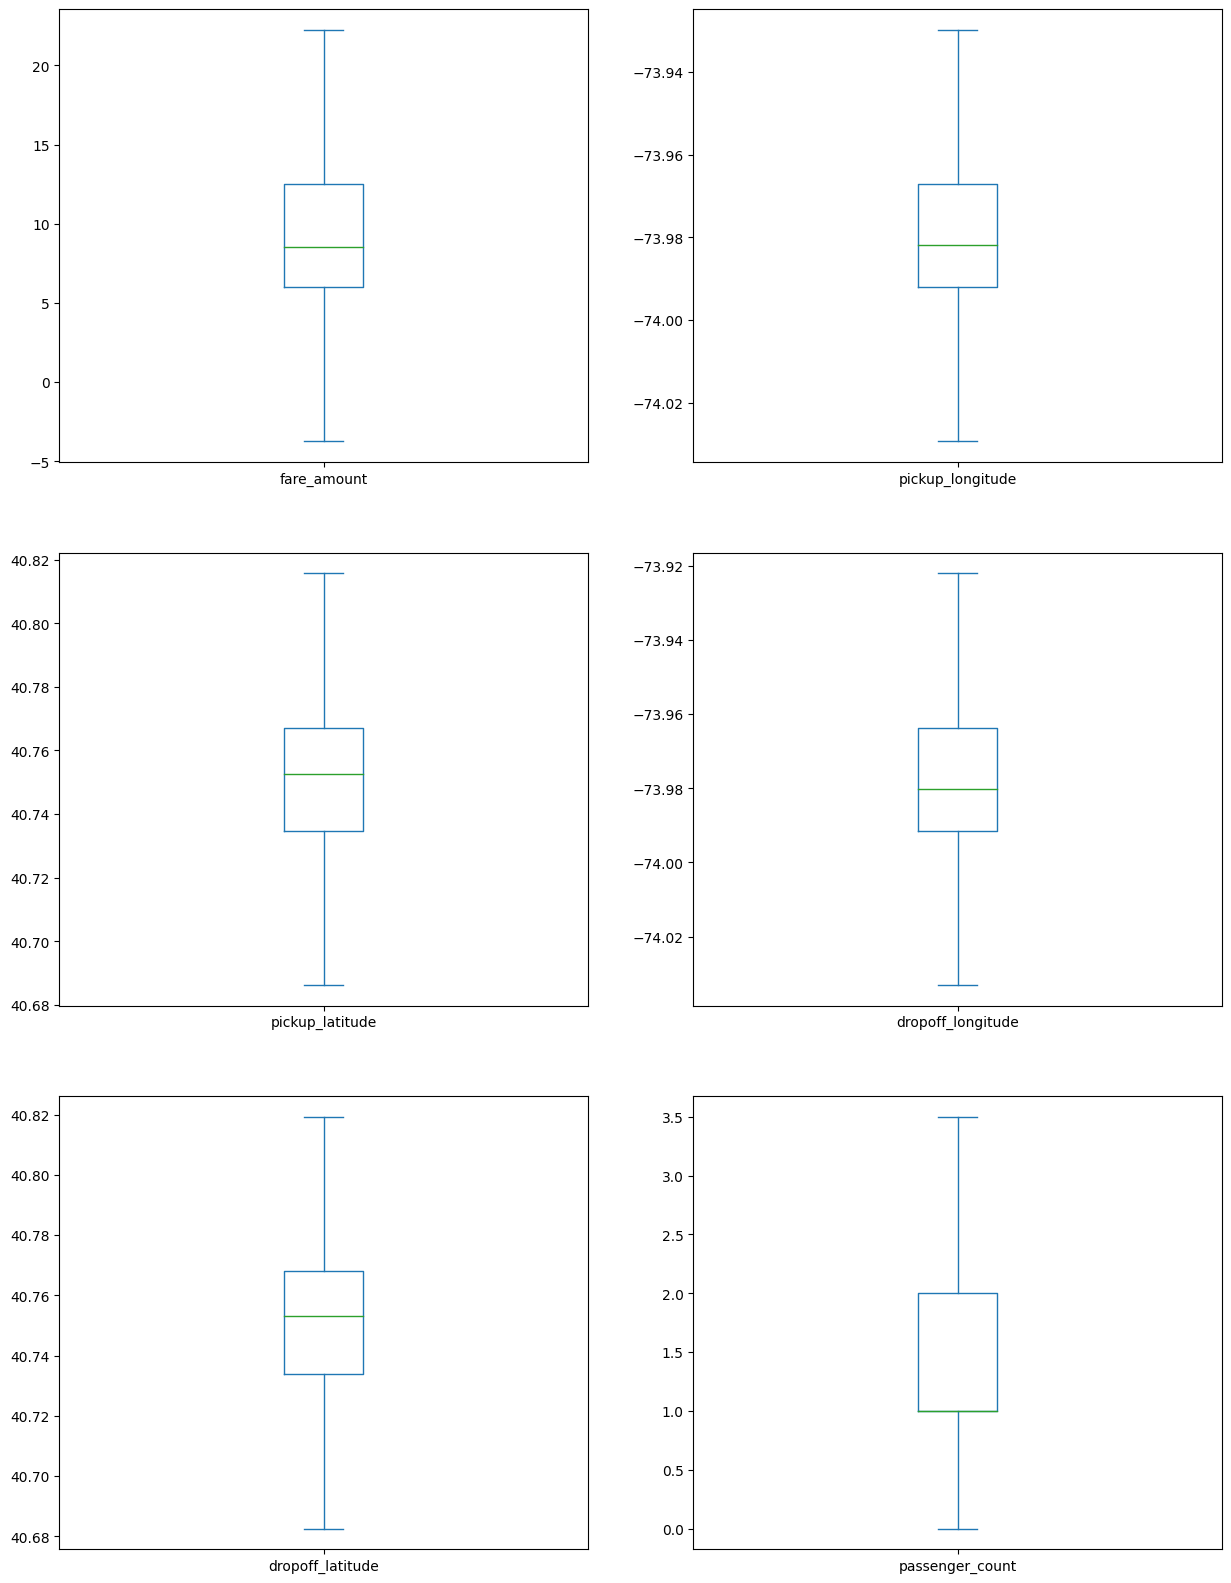

In [129]:
#Boxplot shows that dataset is free from outliers
df.plot(kind = "box",subplots = True,layout = (3,2),figsize=(15,20))
plt.show()

In [130]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000


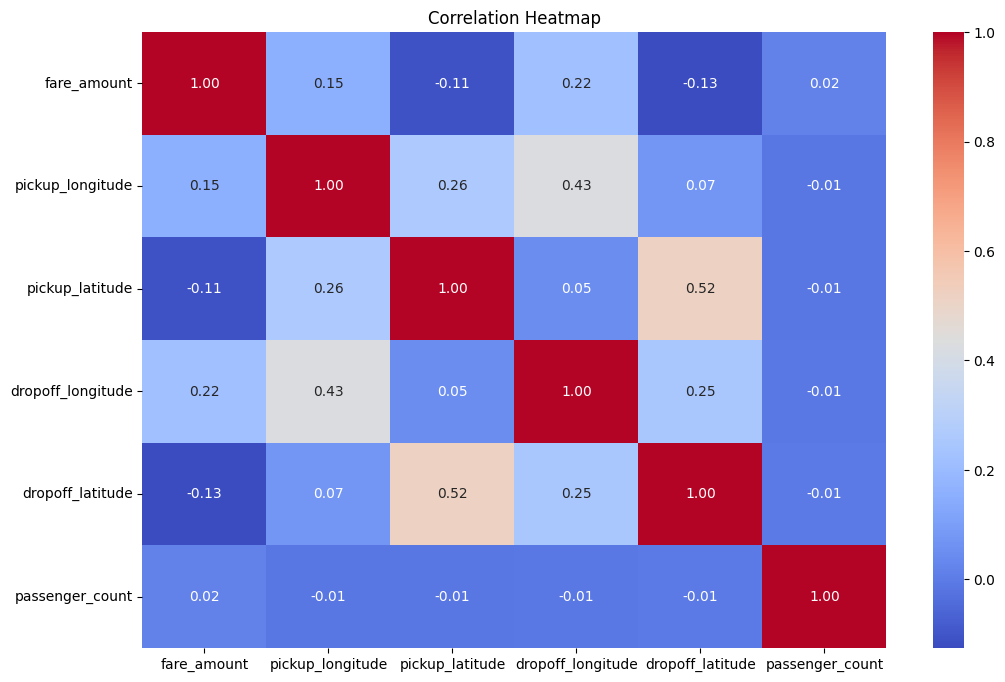

In [131]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# df.corr() calculates the correlation matrix of the DataFrame df.
# Correlation values range between -1 and 1, where:
# 1 indicates a perfect positive correlation,
# 0 indicates no correlation, and
# -1 indicates a perfect negative correlation.

# annot=True:
# This argument adds numeric labels to each cell in the heatmap, showing the exact correlation values within each cell.

# fmt='.2f':
# This specifies the format for the annotations. '.2f' formats each number to display two decimal places,
#  providing a cleaner view of correlation coefficients.

# cmap='coolwarm':
# The cmap parameter defines the color scheme for the heatmap.

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('fare_amount', axis=1)  # create new dataset ignoring 'fare_amount' column
# alternate method : X = df.drop(columns=['fare_amount'])

y = df['fare_amount']  # create a series of only 'fare_amount' column

In [133]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
# Implement Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
# Implement Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values
# alpha parameter controls the strength of regularization applied to the model.
# Regularization Strength: alpha is a positive number, 
# and it adjusts how much penalty is applied to the model's coefficients.

# Higher alpha values increase the regularization strength, 
# which reduces the coefficients more aggressively and makes the model simpler (with lower variance but potentially higher bias).

# Lower alpha values (closer to 0) reduce the regularization strength,
#  making Ridge regression behave more like simple linear regression with little to no penalty on the coefficients

# Default Value: In scikit-learn, alpha=1.0 is the default setting, providing a balanced level of regularization.
# By adjusting alpha, you can control the balance between model bias and variance

# By experimenting with different values of alpha, you can find a suitable level of regularization for your specific dataset.
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [137]:
# Implement Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can experiment with different alpha values
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - R2 Score: {r2:.4f}, RMSE: {rmse:.2f}")

In [139]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Linear Regression - R2 Score: 0.0911, RMSE: 5.20
Ridge Regression - R2 Score: 0.0911, RMSE: 5.20
Lasso Regression - R2 Score: 0.0896, RMSE: 5.20
